# Capstone Regression Project

## Business Understanding

## Data Understanding

-describes source of dataset
There are two datasets used for this project.  The first was the king county dataset.  

The second dataset was obtained from https://www.zipdatamaps.com/king-wa-county-zipcodes

-what each record represents
-which column is begin used as the regress

## Data Preparation

### Loading the Data

In [1319]:
#importing all appropriate Pythonic libraries and packages 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import re
%matplotlib inline

In [1320]:
# reading in the King County dataset to Pandas
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [1321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [1322]:
# dropping the placeholder column
df.drop(labels='id', axis=1, inplace=True)

In [1323]:
# converting all dates to datetime
df['date'] = pd.to_datetime(df['date'])

In [1324]:
# isolating the zip code 
# alternative methods to achieve same
# df['Zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
# df['address'][0].split(',')[2][-5:]
# df['address'][1000][-20:-15]

In [1325]:
df['Zipcode'] = df['address'].apply(lambda x: x[-20:-15])

In [1326]:
df['Zipcode'] = df['Zipcode'].astype(int)

<AxesSubplot:>

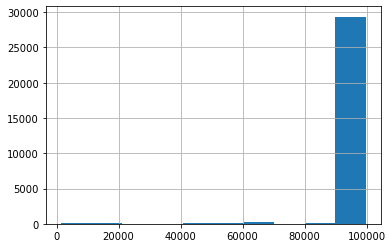

In [1327]:
df['Zipcode'].hist()

In [1328]:
# controling for outliers
df = df.loc[(df['Zipcode'] > 98000) & (df['Zipcode'] <= 98922)]

In [1329]:
# reading in Zip/Neighborhood/Population dataset
df_zip = pd.read_csv('data/kc_zipcode_details.csv', index_col=0)
df_zip.tail(55)

,Neighborhood,Population
ZIP Code,,
98158,Seattle,NaN
98161,Seattle,NaN
98164,Seattle,141.0
98166,Seattle,20301.0
98168,Seattle,33734.0
98174,Seattle,NaN
98177,Seattle,19030.0
98178,Seattle,24092.0
98188,Seattle,23111.0


In [1330]:
df.Zipcode.nunique()

88

In [1331]:
# changing index name to match other dataset
df_zip.index.names = ['Zipcode']

In [1332]:
df_zip.reset_index(inplace=True)
df_zip.head()

,Zipcode,Neighborhood,Population
0,98001,Auburn,31911.0
1,98002,Auburn,31647.0
2,98003,Federal Way,44151.0
3,98004,Bellevue,27946.0
4,98005,Bellevue,17714.0


<AxesSubplot:>

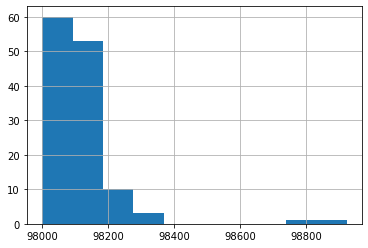

In [1333]:
# Outliers
df_zip['Zipcode'].hist()

In [1334]:
# # controlling for outliers
# df_zip = df_zip.loc[(df_zip['Zipcode'] > 98000) & (df_zip['Zipcode'] <= 98288)]

In [1335]:
df_zip.nunique()

Zipcode         128
Neighborhood     38
Population       85
dtype: int64

In [1336]:
df_zip['Zipcode'].nunique()

128

### Renaming Selldate

In [1337]:
# renaming date to selldate
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate, inplace=True)

## Engineering Yr_Old

In [1338]:
# creating a year old column
df['yr_old'] = np.where(df['yr_renovated'] !=0,df.selldate.apply(lambda x: x.year) - df['yr_renovated'],
                        df['selldate'].apply(lambda x: x.year) - df['yr_built'])

In [1339]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode,yr_old
count,2.924100e+04,29241.000000,29241.000000,29241.000000,2.924100e+04,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000
mean,1.112620e+06,3.435040,2.332239,2130.756643,1.719192e+04,1.517151,1825.820423,480.763654,336.275811,216.363599,1973.878458,93.764304,47.543109,-122.214209,98077.684826,44.741698
std,8.953389e+05,0.978861,0.895780,977.344954,6.125879e+04,0.548585,880.729276,585.935636,286.199465,246.749571,31.684861,422.616958,0.147563,0.143653,55.267033,31.007476
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.636797,-122.666021,98001.000000,-1.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.430065,-122.328290,98032.000000,18.000000
50%,8.670000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,142.000000,1976.000000,0.000000,47.557680,-122.234070,98059.000000,43.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.078000e+04,2.000000,2290.000000,960.000000,510.000000,310.000000,2001.000000,0.000000,47.672045,-122.127475,98117.000000,66.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960,98663.000000,122.000000


In [1342]:
# controlling for dates where house was sold after renovation
df.loc[df['yr_old'] < 0, 'yr_old'] = 0

In [1343]:
df.yr_old.value_counts()

0      1368
1       664
44      504
54      478
16      468
       ... 
122      32
87       31
88       30
119      30
120      27
Name: yr_old, Length: 123, dtype: int64

### Data Cleaning

In [1344]:
# identifying missing values 
df.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001026
sewer_system     0.000445
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
dtype: float64

In [1345]:
# remove missing values in columns
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

In [1346]:
# identify missing values in zip code data
df_zip.isna().sum()/df.shape[0]

Zipcode         0.000000
Neighborhood    0.000000
Population      0.001438
dtype: float64

In [1347]:
df_zip.dropna(subset=['Population'], axis=0, inplace=True)

## Merge on zipcode to include neighborhood/population

In [1348]:
df1 = df.merge(df_zip, how='left', on='Zipcode')

In [1349]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 29199
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  int64         
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  int64         
 5   sqft_lot       29200 non-null  int64         
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

In [1350]:
# identify missing data in new dataset
df1.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.000000
sewer_system     0.000000
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
Neighborhood     0.000856
Population       0.000856
dtype: float64

In [1351]:
df1.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

In [1352]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29175 entries, 0 to 29199
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29175 non-null  datetime64[ns]
 1   price          29175 non-null  float64       
 2   bedrooms       29175 non-null  int64         
 3   bathrooms      29175 non-null  float64       
 4   sqft_living    29175 non-null  int64         
 5   sqft_lot       29175 non-null  int64         
 6   floors         29175 non-null  float64       
 7   waterfront     29175 non-null  object        
 8   greenbelt      29175 non-null  object        
 9   nuisance       29175 non-null  object        
 10  view           29175 non-null  object        
 11  condition      29175 non-null  object        
 12  grade          29175 non-null  object        
 13  heat_source    29175 non-null  object        
 14  sewer_system   29175 non-null  object        
 15  sqft_above     2917

In [1353]:
# no NA/missing values in merged dataset
df1.isna().sum()/df1.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
Zipcode          0.0
yr_old           0.0
Neighborhood     0.0
Population       0.0
dtype: float64

## Protected

The code below was a failed attempt to establish a protected/unprotected feature that would include only homes contained in a greenbelt that likely had some watershed/wildlife/environmental nuisance protection.  It was not correlated with price, nor large enough to be a predictor.  

In [1354]:
# df1.loc[(df1['nuisance'] == 'YES') & (df1['greenbelt'] == 'YES'), 'protected'] = 'protected'
# df1.loc[(df1['nuisance'] != 'YES') | (df1['greenbelt'] != 'YES'), 'protected'] = 'unprotected'

In [1193]:
# df1['protected']

In [1194]:
# df1['protected'].value_counts() 

HomeSales 
standard scaling allows you to find coefficients. 
Be sure to include metric - r squared - to describe overall model performance.  
collineriety 
log scalling
remove outliers.  
Increase r squared. 


1. run model
2. see improvements, clean/feature engineer.  
3. see coefficients becoming more accurate.


## Target distribution

In [1249]:
df1.corr()['price']

price            1.000000
bedrooms         0.290838
bathrooms        0.487932
sqft_living      0.616666
sqft_lot         0.086788
floors           0.199866
sqft_above       0.546010
sqft_basement    0.246373
sqft_garage      0.267238
sqft_patio       0.317644
yr_built         0.105905
yr_renovated     0.085546
lat              0.297701
long             0.081589
Zipcode         -0.106057
Population      -0.111565
Name: price, dtype: float64

`sqft_living` is the most highly correlated feature in the baseline numeric model.  

Price is the singular dependent variable in our model.  

## Modeling

In [1250]:
# Creating categorical variables
cats = df1[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Neighborhood', 'grade']]
cats1 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood', 'grade']]

### Baseline Model

In [1251]:
pred_cols = [x for x in df1.columns if x not in cats1]

In [1252]:
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'Population']

In [1253]:
# create baseline model
preds = df1[pred_cols]
target = df1['price']

In [1254]:
y = target
X = preds
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [1255]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     1962.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:46:45   Log-Likelihood:            -4.3157e+05
No. Observations:               29175   AIC:                         8.632e+05
Df Residuals:                   29160   BIC:                         8.633e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.091e+07   4.12e+06    -22.070      0.000    -9.9e+07   -8.28e+07
bedrooms      -1.351e+05   5210.596    -25.923      0.000   -1.45e+05   -1.25e+05
bathrooms       1.14e+05   7682.601     14.836      0.000    9.89e+04    1.29e+05
sqft_living     325.8084     17.237     18.902      0.000     292.024     359.593
sqft_lot          0.1735      0.064      2.694      0.007       0.047       0.300
floors        -1.058e+05   9749.876    -10.850      0.000   -1.25e+05   -8.67e+04
sqft_above      295.0695     17.603     16.762      0.000     260.567     329.572
sqft_basement    79.3789     13.089      6.065      0.000      53.724     105.034
sqft_garage     -18.5343     18.427     -1.006      0.314     -54.651      17.583
sqft_patio      260.6715     17.052     15.287      0.000     227.248     294.095
yr_built      -1900.9849    181.879    -10.452      0.000   -2257.476   -1544.494
yr_renovated     63.0504      9.410      6.700      0.000      44.606      81.495
lat            1.565e+06   2.72e+04     57.525      0.000    1.51e+06    1.62e+06
long          -1.675e+05    3.2e+04     -5.231      0.000    -2.3e+05   -1.05e+05
Population       -2.5589      0.350     -7.307      0.000      -3.245      -1.873
==============================================================================
Omnibus:                    45391.593   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         79206475.595
Skew:                           9.447   Prob(JB):                         0.00
Kurtosis:                     257.558   Cond. No.                     6.98e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1256]:
baseline_mae = mean_absolute_error(y, results.predict(sm.add_constant(X)))
baseline_mae

338532.32079385564

This baseline model is limited to both discrete and continuous numeric predictors.  

Based on the Mean Absolute Error ('MAE'), overall this baseline model is off by about an average of $338,488.68 for any given prediction. This calculation is the mean absolute (regardless of whether it is positve or negative) distance of all errors.   

The intercept is extremely negative, at minus 9 to the 7th power.  

The coefficient for `sqft_living` tells us that for each increase of square foot living space, we see an associated increase in saleprice of about $327.83 dollars.  

## Improving upon the baseline

## Grade - a failed attempt at making an Ordinal category numeric

In [1257]:
# df1.grade.value_counts()

In [1258]:
# df1.grade.value_counts()

In [827]:
# # grade_map = {
#     "7 Average": 7,
#     "8 Good": 8,
#     "9 Better": 9,
#     "6 Low Average": 6,
#     "5 Fair": 5,
#     "4 Low": 4,
#     "3 Poor": 3,
#     "2 Substandard": 2,
#     "10 Very Good": 10,
#     "11 Excellent": 11,
#     "13 Mansion": 13,
#     "12 Luxury": 12,
# }

In [828]:
# df1.grade = df1.grade.map(grade_map)

In [829]:
# making results more model friendly 
# dum_df1.loc[dum_df1['grade'] == '2 Substandard', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '3 Poor', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '4 Low', 'grade'] = 1

# dum_df1.loc[dum_df1['grade'] == '5 Fair', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '6 Low Average', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '7 Average', 'grade'] = 2

# dum_df1.loc[dum_df1['grade'] == '8 Good', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '9 Better', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '10 Very Good', 'grade'] = 3

# dum_df1.loc[dum_df1['grade'] == '11 Excellent', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '12 Luxury', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '13 Mansion', 'grade'] = 4

The above code, which was not used, was a brief lesson in why you do not want to force ordinal categories into continuous numeric variables, unless the values are in fact multiples of each other.    

## Lesson

scatter plot: visualize relationship  

box plot: gives you quantile info

histograms: distribution of frequencies 

qq plot residuals (outside of range) is 

In [830]:
# plt.boxplot(df1.price)

In [831]:
# sns.heatmap(X.corr())

## Discrete numeric predictors 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

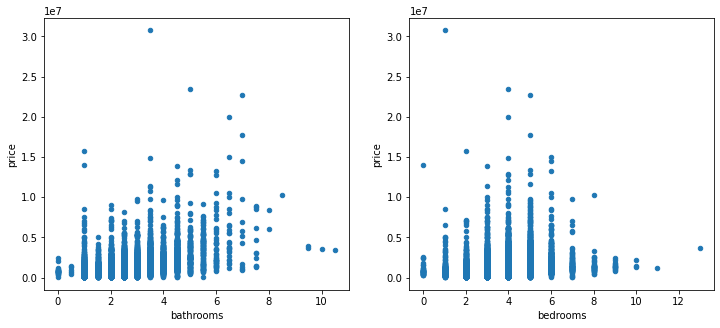

In [1259]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='bathrooms', y='price', ax=ax1)
df1.plot.scatter(x='bedrooms', y='price', ax=ax2)

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

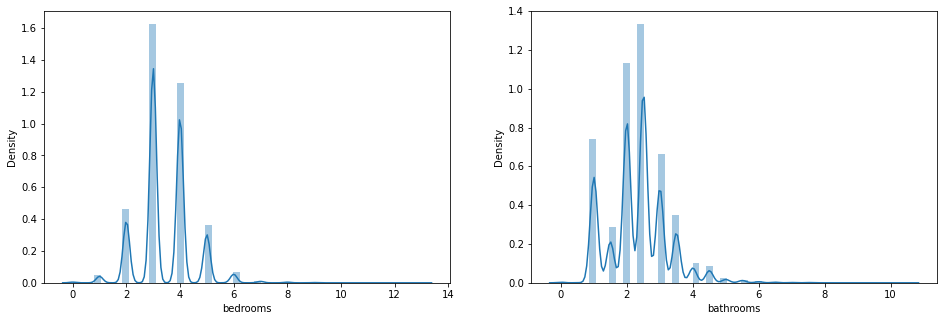

In [1260]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['bedrooms'])
plt.subplot(1,2,2)
sns.distplot(df1['bathrooms'])

In [1261]:
upper_limit = df1['bedrooms'].mean() + 3*df1['bedrooms'].std()
lower_limit = df1['bedrooms'].mean() - 3*df1['bedrooms'].std()
df1['bedrooms'] = np.where(df1['bedrooms'] > upper_limit, upper_limit,
np.where(df1['bedrooms'] < lower_limit, lower_limit, df1['bedrooms']))

In [1262]:
upper_limit = df1['bathrooms'].mean() + 3*df1['bathrooms'].std()
lower_limit = df1['bathrooms'].mean() - 3*df1['bathrooms'].std()

df1['bathrooms'] = np.where(df1['bathrooms'] > upper_limit, upper_limit,
    np.where(df1['bathrooms'] < lower_limit, lower_limit, df1['bathrooms']))

KeyError: 'yr_old'

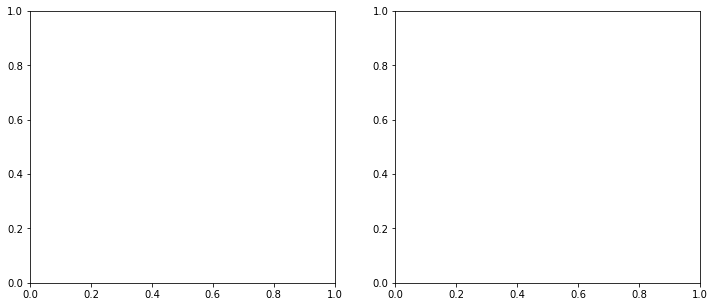

In [1263]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='yr_old', y='price', ax=ax1)
df1.plot.scatter(x='floors', y='price', ax=ax2)

In [1264]:
upper_limit = df1['yr_old'].mean() + 3*df1['yr_old'].std()
lower_limit = df1['yr_old'].mean() - 3*df1['yr_old'].std()
df1['yr_old'] = np.where(df1['yr_old'] > upper_limit, upper_limit,
np.where(df1['yr_old'] < lower_limit, lower_limit, df1['yr_old']))

KeyError: 'yr_old'

In [1265]:
upper_limit = df1['floors'].mean() + 3*df1['floors'].std()
lower_limit = df1['floors'].mean() - 3*df1['floors'].std()
df1['floors'] = np.where(df1['floors'] > upper_limit, upper_limit,
np.where(df1['floors'] < lower_limit, lower_limit, df1['floors']))

KeyError: 'yr_old'

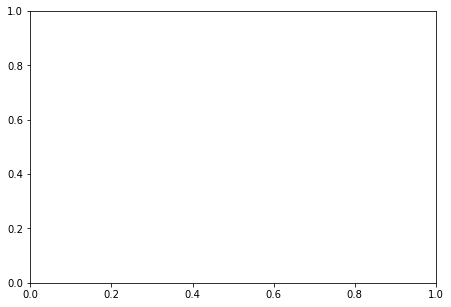

In [1266]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['yr_old'])
plt.subplot(1,2,2)
sns.distplot(df1['floors'])

## Continuous numerice predictors

<AxesSubplot:xlabel='sqft_garage', ylabel='price'>

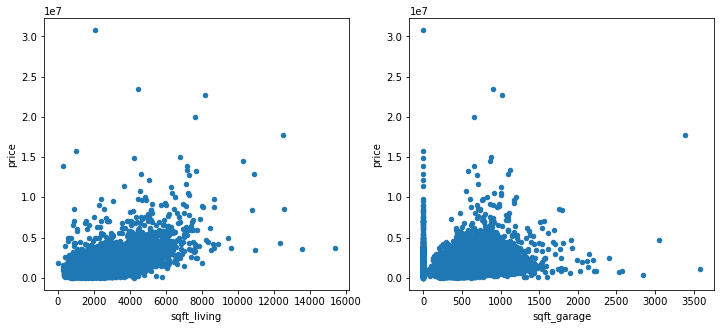

In [1267]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='sqft_living', y='price', ax=ax1)
df1.plot.scatter(x='sqft_garage', y='price', ax=ax2)

In [1268]:
upper_limit = df1['sqft_garage'].mean() + 3*df1['sqft_garage'].std()
lower_limit = df1['sqft_garage'].mean() - 3*df1['sqft_garage'].std()

df1['sqft_garage'] = np.where(df1['sqft_garage'] > upper_limit, upper_limit,
    np.where(df1['sqft_garage'] < lower_limit, lower_limit, df1['sqft_garage']))

In [1269]:
upper_limit = df1['sqft_living'].mean() + 3*df1['sqft_living'].std()
lower_limit = df1['sqft_living'].mean() - 3*df1['sqft_living'].std()

df1['sqft_living'] = np.where(df1['sqft_living'] > upper_limit, upper_limit,
    np.where(df1['sqft_living'] < lower_limit, lower_limit, df1['sqft_living']))

<AxesSubplot:xlabel='sqft_garage', ylabel='Density'>

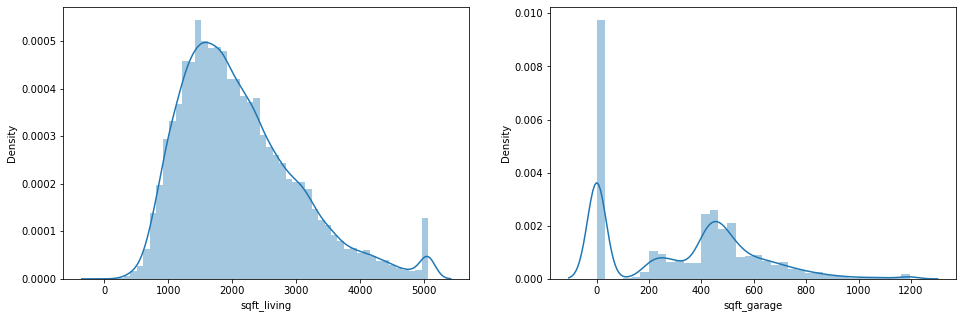

In [1270]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['sqft_living'])
plt.subplot(1,2,2)
sns.distplot(df1['sqft_garage'])

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

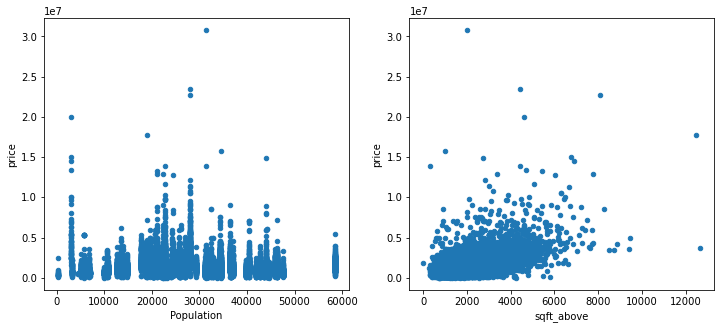

In [1271]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='Population', y='price', ax=ax1)
df1.plot.scatter(x='sqft_above', y='price', ax=ax2)

In [1272]:
upper_limit = df1['Population'].mean() + 3*df1['Population'].std()
lower_limit = df1['Population'].mean() - 3*df1['Population'].std()

df1['Population'] = np.where(df1['Population'] > upper_limit, upper_limit,
    np.where(df1['Population'] < lower_limit, lower_limit, df1['Population']))

In [1273]:
upper_limit = df1['sqft_above'].mean() + 3*df1['sqft_above'].std()
lower_limit = df1['sqft_above'].mean() - 3*df1['sqft_above'].std()

df1['sqft_above'] = np.where(df1['sqft_above'] > upper_limit, upper_limit,
    np.where(df1['sqft_above'] < lower_limit, lower_limit, df1['sqft_above']))

<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

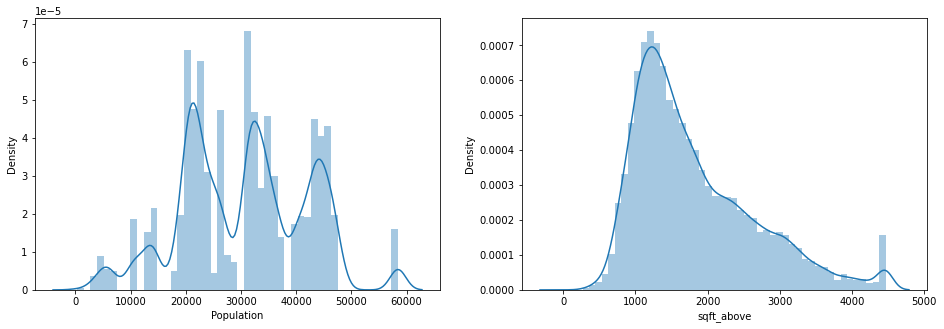

In [1274]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Population'])
plt.subplot(1,2,2)
sns.distplot(df1['sqft_above'])

<AxesSubplot:xlabel='sqft_patio', ylabel='price'>

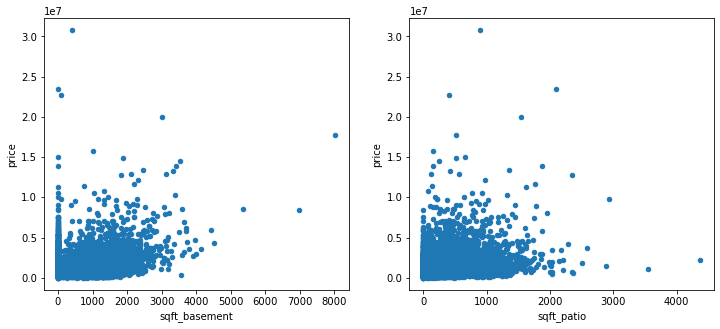

In [1275]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='sqft_basement', y='price', ax=ax1)
df1.plot.scatter(x='sqft_patio', y='price', ax=ax2)

In [1276]:
upper_limit = df1['sqft_basement'].mean() + 3*df1['sqft_basement'].std()
lower_limit = df1['sqft_basement'].mean() - 3*df1['sqft_basement'].std()

df1['sqft_basement'] = np.where(df1['sqft_basement'] > upper_limit, upper_limit,
    np.where(df1['sqft_basement'] < lower_limit, lower_limit, df1['sqft_basement']))

In [1277]:
upper_limit = df1['sqft_patio'].mean() + 3*df1['sqft_patio'].std()
lower_limit = df1['sqft_patio'].mean() - 3*df1['sqft_patio'].std()

df1['sqft_patio'] = np.where(df1['sqft_patio'] > upper_limit, upper_limit,
    np.where(df1['sqft_patio'] < lower_limit, lower_limit, df1['sqft_patio']))

<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

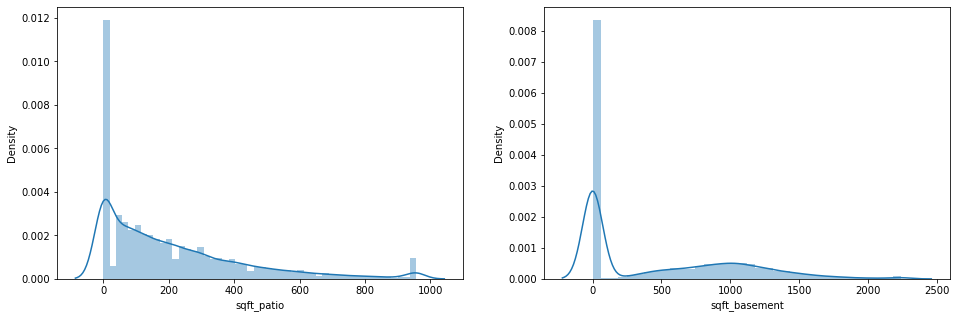

In [1278]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['sqft_patio'])
plt.subplot(1,2,2)
sns.distplot(df1['sqft_basement'])

Population looks like a discrete measure here.  We will go with sqft living as the most correlated to begin our greedy algorithm approach.

## Categorical Variables

In [1279]:
# cats2 = ['waterfront', 'view', 'grade', 'condition']
# fig, axes = plt.subplots(ncols=len(cats2), figsize=(12,5))
# for index, feature in enumerate(cats2):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=axes[index])


There is some real symetry in the grade category.  As the grade increases, it appears that the average price of homes increases as well.  Good views and waterfront properties also seem correlated positively with price, which is understandable.  

In [1280]:
# cats3 = ['nuisance', 'sewer_system', 'greenbelt']
# fig, axes = plt.subplots(ncols=len(cats3), figsize=(12,5))
# for index, feature in enumerate(cats3):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=axes[index])

Not much can be gleaned from these bar charts.  

In [1281]:
# plt.scatter(df1.sewer_system, df1.price)

In [1282]:
# plt.scatter(df1.greenbelt, df1.price)

In [1283]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='condition', y='price', ax=ax1)
# df1.sort_values(by='price', ascending=False).plot.scatter(x='view', y='price', ax=ax2)

In [1284]:
# fig, (ax) = plt.subplots (ncols=1, figsize = (15, 10))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='grade', y='price', ax=ax)

## Attempts at some partial models.  

In [1285]:
y = df1.price
# X_iter = df1[['sqft_living', 'waterfront', 'grade']]

In [1286]:
# X_iter = pd.get_dummies(X_iter, columns=['grade', 'waterfront'], drop_first=True)

In [1287]:
# model = sm.OLS(y, sm.add_constant(X_iter))
# results = model.fit()
# print(results.summary())

In [1288]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter)))
# mae

The explained variance is higher, but the MAE is worse than our baseline model.  This model is now off by about $359,121.21 for any given prediction.  We will need to adjust the model.  We will attempt some partial regressions below to see what stands out.   

## Partial regression of Grade, sqft_living, and waterfront

In [1289]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

## Model and partial of Sqft Living, Waterfront, and View

In [1290]:
# y = df1.price
# X_iter2 = df1[['sqft_living', 'waterfront', 'view']]

In [1291]:
# X_iter2 = pd.get_dummies(X_iter2, columns=['view', 'waterfront'], drop_first=True)

In [1292]:
# model = sm.OLS(y, sm.add_constant(X_iter2))
# results = model.fit()
# print(results.summary())

In [851]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter2)))
# mae

In [852]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter2.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

While I feel strongly about sqft living, I am beginning to think view does not have much impact on price as we predicted.  Perhaps the relationship can be better explained by a term or some transformation.  

# Neighborhood

In [853]:
# Neigh = ['Neighborhood']
# fig, ax = plt.subplots(ncols=len(Neigh), figsize=(12,5))
# for index, feature in enumerate(Neigh):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=ax)


In [854]:
# y = df1.price
# X_iter_Neigh = df1[['Neighborhood', 'sqft_living', 'waterfront']]
# X_iter_Neigh = pd.get_dummies(X_iter_Neigh, columns=['Neighborhood', 'waterfront'], drop_first=True)

In [855]:
# model = sm.OLS(y, sm.add_constant(X_iter_Neigh))
# results = model.fit()
# print(results.summary())

In [856]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter_Neigh)))
# mae

Neighborhood really seems to explain a great deal about the variance in price, and it reduced our MAE down from our baseline.  Our predictions are now around $313,516.77 off by any given predictor.    

In [857]:
# X_iter_Neigh

In [858]:
# fig = plt.figure(figsize=(275,475))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter_Neigh.columns),
#     grid=(16,16),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [859]:
# # running our model with dummified predictors
# X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
#                        'sewer_system_PUBLIC RESTRICTED', 'yr_built', 'sqft_above', 'bathrooms',
#                       'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
#                       'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
#                       'Neighborhood_Baring' ], axis=1)
# y=dum_df1.price

# model_1 = sm.OLS(y, sm.add_constant(X1))
# results1 = model_1.fit()
# results1.summary()

In [860]:
# baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
# # baseline_mae

In [861]:
# dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [862]:
# dum_df1.columns

Drop columns not correlated.  per gp 9-19.  

In [863]:
# plt.hist(df1.price)

In [864]:
# sns.distplot(df1.price, bins=30, kde=True)

## Cleaning data

applying a function to remove outliers outside 3 standard deviations

## Bedrooms

In [1293]:
# here we remove outliers by adding them to the highest, most relevant category, thus preserving data.  
df1.bathrooms.value_counts()

2.500000    8172
2.000000    6935
1.000000    4551
3.000000    4076
3.500000    2146
1.500000    1765
4.000000     637
4.500000     523
5.016428     199
5.000000     142
0.000000      24
0.500000       5
Name: bathrooms, dtype: int64

In [1294]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode,Population
count,2.917500e+04,29175.000000,29175.000000,29175.000000,2.917500e+04,29175.000000,29175.000000,29175.000000,29175.000000,29175.000000,29175.000000,29175.000000,29175.000000,29175.000000,29175.000000,29175.000000
mean,1.112942e+06,3.431607,2.325613,2118.450148,1.712491e+04,1.515715,1816.363627,478.025536,334.863086,211.370485,1973.841988,93.705604,47.543125,-122.214451,98077.466324,30451.927198
std,8.956167e+05,0.950838,0.865603,917.673207,6.082535e+04,0.545133,837.449359,572.026869,278.554990,223.372870,31.657833,422.498521,0.146130,0.143075,54.666578,11308.138966
min,2.736000e+04,0.506741,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.159700,-122.526650,98001.000000,294.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.430280,-122.328385,98032.000000,21147.000000
50%,8.680000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.557680,-122.234335,98059.000000,31365.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.076650e+04,2.000000,2290.000000,960.000000,520.000000,310.000000,2001.000000,0.000000,47.671963,-122.127725,98117.000000,39816.000000
max,3.075000e+07,6.366815,5.016428,5061.318228,3.253932e+06,3.161346,4466.382318,2239.840067,1195.089702,956.586968,2022.000000,2022.000000,47.789830,-121.163960,98354.000000,58442.000000


In [1295]:
# df1.loc[(df1['bedrooms'] > 6) & (df1['bathrooms'] > 6)]

In [1296]:
df1.bathrooms.value_counts()

2.500000    8172
2.000000    6935
1.000000    4551
3.000000    4076
3.500000    2146
1.500000    1765
4.000000     637
4.500000     523
5.016428     199
5.000000     142
0.000000      24
0.500000       5
Name: bathrooms, dtype: int64

Anything with zero bathrooms is suspect. 

In [1297]:
# df1.loc[df1['bathrooms'] < 1] = 1
# df1.loc[df1['bathrooms'] > 6] = 6

In [1298]:
# def change_value(condition): 
#     new_living = df1.sqft_living = np.sum(df1.sqft_living, (df1.sqft_garage*.75))
#     new_garage = df1.sqft_garage = np.subtract(df1.sqft_garage, (df1.sqft_garage*.75))
#     if condition == df1.loc[df1['sqft_garage'] > ['sqft_living']]:
#         return new_living, new_garage

In [1299]:
# df1.sqft_garage.apply(change_value)

In [1300]:
# X_iter

In [1301]:
# iter_model = sm.OLS(y, sm.add_constant(X_iter))
# iter_results = iter_model.fit()
# print(iter_results.summary())

In [1302]:
# iter_mae = mean_absolute_error(y, iter_results.predict(sm.add_constant(X_iter)))
# iter_mae

Our iterated model explains about 53 percent of the variance in `price` using `sqft_living` and `Neighborhood`. There  Overall this model is statistically significant, explaining about 38 percent of the variance in price.

In [1303]:
# fig = plt.figure(figsize=(30,220))
# sm.graphics.plot_partregress_grid(
#     iter_results, 
#     exog_idx=list(X_iter.columns),
#     grid=(14,15),
#     fig=fig)
# plt.tight_layout()
# plt.show()

<AxesSubplot:>

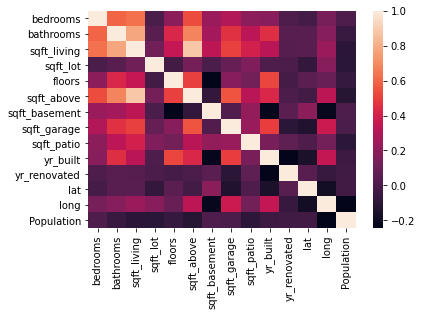

In [1304]:
sns.heatmap(X.corr())

ccpr function partial 

In [1305]:
# df1['Neighborhood'].value_counts()

In [1306]:
# sns.heatmap(X.corr())

In [1307]:
# df1.heat_source

### Model Iteration

In [1308]:
# Creating categorical variables
cats = df1[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Neighborhood', 'grade']]
cats1 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood', 'grade']]

In [1309]:
cat_cols = cats.columns
dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [1310]:
# running our model with dummified predictors
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard'], axis=1)
y=df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     793.1
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:47:49   Log-Likelihood:            -4.2653e+05
No. Observations:               29175   AIC:                         8.532e+05
Df Residuals:                   29110   BIC:                         8.537e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            3.547e+06    3.3e+05     10.738      0.000     2.9e+06    4.19e+06
bedrooms                        -2.991e+04   4810.831     -6.218      0.000   -3.93e+04   -2.05e+04
bathrooms                        7.608e+04   6684.189     11.382      0.000     6.3e+04    8.92e+04
sqft_living                        24.6166     14.881      1.654      0.098      -4.551      53.784
sqft_lot                            0.5003      0.058      8.687      0.000       0.387       0.613
sqft_above                        268.3400     14.748     18.195      0.000     239.433     297.247
sqft_basement                     137.7866     11.130     12.380      0.000     115.971     159.602
sqft_garage                      -128.6146     16.430     -7.828      0.000    -160.818     -96.412
sqft_patio                         56.4669     16.401      3.443      0.001      24.320      88.614
yr_built                        -1553.9270    165.165     -9.408      0.000   -1877.657   -1230.197
yr_renovated                       43.2709      8.185      5.286      0.000      27.227      59.315
Population                          1.0568      0.377      2.807      0.005       0.319       1.795
waterfront_YES                   7.462e+05   2.93e+04     25.440      0.000    6.89e+05    8.04e+05
greenbelt_YES                   -7.006e+04   2.05e+04     -3.418      0.001    -1.1e+05   -2.99e+04
nuisance_YES                    -2.308e+04   8653.883     -2.667      0.008      -4e+04   -6114.027
view_EXCELLENT                    6.63e+05   2.97e+04     22.342      0.000    6.05e+05    7.21e+05
view_FAIR                        1.169e+05   3.91e+04      2.988      0.003    4.02e+04    1.94e+05
view_GOOD                        4.736e+04   2.24e+04      2.117      0.034    3513.542    9.12e+04
view_NONE                       -8.204e+04   1.35e+04     -6.062      0.000   -1.09e+05   -5.55e+04
condition_Fair                  -1.217e+05    3.7e+04     -3.292      0.001   -1.94e+05   -4.93e+04
condition_Good                   3.909e+04   8102.049      4.824      0.000    2.32e+04     5.5e+04
condition_Poor                  -9.444e+04   7.17e+04     -1.317      0.188   -2.35e+05    4.61e+04
condition_Very Good               1.01e+05   1.14e+04      8.873      0.000    7.87e+04    1.23e+05
heat_source_Electricity/Solar   -8.069e+04   7.21e+04     -1.119      0.263   -2.22e+05    6.06e+04
heat_source_Gas                  1.232e+04   7724.504      1.595      0.111   -2822.301    2.75e+04
heat_source_Gas/Solar             1.83e+05   5.67e+04      3.229      0.001    7.19e+04    2.94e+05
sewer_system_PRIVATE RESTRICTED -5.911e+05   2.48e+05     -2.388      0.017   -1.08e+06   -1.06e+05
sewer_system_PUBLIC              9.051e+04   1.12e+04      8.098      0.000    6.86

In [1311]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

275085.9270423972

### Utilizing categorical variables

Well, we have a much higher R-squared number after incorporating the dummified categorical predictors, as this model claims to explain 64 percent of the variance in `price`.   The constant is no longer statistically significant, so we need to adjust our figures to more accurately account for why that is happening.  We should next remove columns that are statistically significant.  

MAE dropped significantly.  

## Addressing Multicolinerity

In [1312]:
X1.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
bedrooms,1.000000,0.595132,0.651580,-0.000102,0.549862,0.233347,0.319387,0.199271,0.189486,0.008750,...,0.105243,0.069723,0.044815,-0.032580,-0.083456,-0.165261,-0.250092,-0.104077,0.087981,0.171799
bathrooms,0.595132,1.000000,0.777592,0.036177,0.674476,0.242933,0.466942,0.337319,0.465433,0.041501,...,0.207650,0.152674,0.085585,-0.026902,-0.060360,-0.158881,-0.368283,-0.286733,0.189431,0.274837
sqft_living,0.651580,0.777592,1.000000,0.112210,0.877221,0.306726,0.506436,0.404538,0.341083,0.037569,...,0.285114,0.188442,0.092017,-0.025643,-0.064466,-0.152820,-0.324331,-0.339840,0.102082,0.331219
sqft_lot,-0.000102,0.036177,0.112210,1.000000,0.121869,-0.002481,0.077591,0.139125,0.012554,0.007671,...,0.048622,0.054327,0.022921,0.020680,0.034163,0.041430,0.004429,-0.053376,-0.026535,0.021503
sqft_above,0.549862,0.674476,0.877221,0.121869,1.000000,-0.106239,0.556535,0.312967,0.441457,0.008017,...,0.268633,0.176192,0.090109,-0.022602,-0.056173,-0.129679,-0.286874,-0.365705,0.095235,0.344370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grade_5 Fair,-0.165261,-0.158881,-0.152820,0.041430,-0.129679,-0.067470,-0.127662,-0.064007,-0.140405,-0.004473,...,-0.013669,-0.007494,-0.003318,-0.002031,-0.004595,1.000000,-0.038035,-0.093600,-0.076332,-0.043311
grade_6 Low Average,-0.250092,-0.368283,-0.324331,0.004429,-0.286874,-0.112551,-0.302619,-0.147633,-0.308220,0.014267,...,-0.038877,-0.021313,-0.009437,-0.005778,-0.013070,-0.038035,1.000000,-0.266216,-0.217103,-0.123184
grade_7 Average,-0.104077,-0.286733,-0.339840,-0.053376,-0.365705,0.029374,-0.196190,-0.178991,-0.270761,0.013225,...,-0.095672,-0.052450,-0.023224,-0.014218,-0.032165,-0.093600,-0.266216,1.000000,-0.534271,-0.303145
grade_8 Good,0.087981,0.189431,0.102082,-0.026535,0.095235,0.012753,0.117347,0.055667,0.252723,-0.020331,...,-0.078022,-0.042774,-0.018940,-0.011595,-0.026231,-0.076332,-0.217103,-0.534271,1.000000,-0.247220


In [1313]:
abs(X1.corr()) > .75

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grade_5 Fair,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
grade_6 Low Average,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
grade_7 Average,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
grade_8 Good,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [1314]:
X2 = X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
X2['pairs'] = list(zip(X2.level_0, X2.level_1))
X2.set_index(['pairs'], inplace=True)
X2.drop(columns=['level_1', 'level_0'], inplace = True)
X2.columns = ['cc']
X2.drop_duplicates(inplace=True)
X2[(X2.cc>.75) & (X2.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.877221
"(bathrooms, sqft_living)",0.777592


In [1181]:
X1.drop(columns=['yr_built'], inplace=True)

There are three sets of variables that are highly correlated: yr_old and yr_built, sqft_above
and sqft_living, and bathrooms with sqft_living

In [1315]:
# running our model with dummified predictors
y=dum_df1.price
model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     793.1
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:48:14   Log-Likelihood:            -4.2653e+05
No. Observations:               29175   AIC:                         8.532e+05
Df Residuals:                   29110   BIC:                         8.537e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            3.547e+06    3.3e+05     10.738      0.000     2.9e+06    4.19e+06
bedrooms                        -2.991e+04   4810.831     -6.218      0.000   -3.93e+04   -2.05e+04
bathrooms                        7.608e+04   6684.189     11.382      0.000     6.3e+04    8.92e+04
sqft_living                        24.6166     14.881      1.654      0.098      -4.551      53.784
sqft_lot                            0.5003      0.058      8.687      0.000       0.387       0.613
sqft_above                        268.3400     14.748     18.195      0.000     239.433     297.247
sqft_basement                     137.7866     11.130     12.380      0.000     115.971     159.602
sqft_garage                      -128.6146     16.430     -7.828      0.000    -160.818     -96.412
sqft_patio                         56.4669     16.401      3.443      0.001      24.320      88.614
yr_built                        -1553.9270    165.165     -9.408      0.000   -1877.657   -1230.197
yr_renovated                       43.2709      8.185      5.286      0.000      27.227      59.315
Population                          1.0568      0.377      2.807      0.005       0.319       1.795
waterfront_YES                   7.462e+05   2.93e+04     25.440      0.000    6.89e+05    8.04e+05
greenbelt_YES                   -7.006e+04   2.05e+04     -3.418      0.001    -1.1e+05   -2.99e+04
nuisance_YES                    -2.308e+04   8653.883     -2.667      0.008      -4e+04   -6114.027
view_EXCELLENT                    6.63e+05   2.97e+04     22.342      0.000    6.05e+05    7.21e+05
view_FAIR                        1.169e+05   3.91e+04      2.988      0.003    4.02e+04    1.94e+05
view_GOOD                        4.736e+04   2.24e+04      2.117      0.034    3513.542    9.12e+04
view_NONE                       -8.204e+04   1.35e+04     -6.062      0.000   -1.09e+05   -5.55e+04
condition_Fair                  -1.217e+05    3.7e+04     -3.292      0.001   -1.94e+05   -4.93e+04
condition_Good                   3.909e+04   8102.049      4.824      0.000    2.32e+04     5.5e+04
condition_Poor                  -9.444e+04   7.17e+04     -1.317      0.188   -2.35e+05    4.61e+04
condition_Very Good               1.01e+05   1.14e+04      8.873      0.000    7.87e+04    1.23e+05
heat_source_Electricity/Solar   -8.069e+04   7.21e+04     -1.119      0.263   -2.22e+05    6.06e+04
heat_source_Gas                  1.232e+04   7724.504      1.595      0.111   -2822.301    2.75e+04
heat_source_Gas/Solar             1.83e+05   5.67e+04      3.229      0.001    7.19e+04    2.94e+05
sewer_system_PRIVATE RESTRICTED -5.911e+05   2.48e+05     -2.388      0.017   -1.08e+06   -1.06e+05
sewer_system_PUBLIC              9.051e+04   1.12e+04      8.098      0.000    6.86

In [1316]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

275085.9270423972

### Final Model

In [1317]:
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard', 'Neighborhood_Enumclaw', 'heat_source_Electricity/Solar'], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     818.6
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:48:18   Log-Likelihood:            -4.2653e+05
No. Observations:               29175   AIC:                         8.532e+05
Df Residuals:                   29112   BIC:                         8.537e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            3.559e+06    3.3e+05     10.777      0.000    2.91e+06    4.21e+06
bedrooms                        -3.002e+04   4809.747     -6.241      0.000   -3.94e+04   -2.06e+04
bathrooms                        7.608e+04   6683.673     11.383      0.000     6.3e+04    8.92e+04
sqft_living                        24.3991     14.878      1.640      0.101      -4.763      53.561
sqft_lot                            0.5046      0.057      8.800      0.000       0.392       0.617
sqft_above                        268.5070     14.747     18.208      0.000     239.603     297.411
sqft_basement                     137.8931     11.130     12.390      0.000     116.078     159.708
sqft_garage                      -128.5870     16.429     -7.827      0.000    -160.789     -96.385
sqft_patio                         56.4553     16.400      3.442      0.001      24.311      88.600
yr_built                        -1557.0531    165.144     -9.428      0.000   -1880.743   -1233.363
yr_renovated                       43.1564      8.183      5.274      0.000      27.116      59.196
Population                          1.0289      0.374      2.748      0.006       0.295       1.763
waterfront_YES                    7.46e+05   2.93e+04     25.450      0.000    6.89e+05    8.03e+05
greenbelt_YES                   -7.001e+04   2.05e+04     -3.416      0.001    -1.1e+05   -2.98e+04
nuisance_YES                    -2.296e+04   8653.424     -2.653      0.008   -3.99e+04   -5998.219
view_EXCELLENT                   6.622e+05   2.97e+04     22.319      0.000    6.04e+05     7.2e+05
view_FAIR                        1.167e+05   3.91e+04      2.984      0.003       4e+04    1.93e+05
view_GOOD                        4.779e+04   2.24e+04      2.137      0.033    3960.441    9.16e+04
view_NONE                       -8.248e+04   1.35e+04     -6.102      0.000   -1.09e+05    -5.6e+04
condition_Fair                  -1.217e+05    3.7e+04     -3.293      0.001   -1.94e+05   -4.93e+04
condition_Good                   3.908e+04   8101.025      4.824      0.000    2.32e+04     5.5e+04
condition_Poor                  -9.417e+04   7.17e+04     -1.313      0.189   -2.35e+05    4.64e+04
condition_Very Good               1.01e+05   1.14e+04      8.872      0.000    7.87e+04    1.23e+05
heat_source_Gas                  1.295e+04   7704.774      1.681      0.093   -2151.161    2.81e+04
heat_source_Gas/Solar             1.84e+05   5.67e+04      3.247      0.001    7.29e+04    2.95e+05
sewer_system_PRIVATE RESTRICTED -5.918e+05   2.48e+05     -2.391      0.017   -1.08e+06   -1.07e+05
sewer_system_PUBLIC              9.034e+04   1.12e+04      8.084      0.000    6.84e+04    1.12e+05
Neighborhood_Bellevue            1.027e+06   1.86e+04     55.316      0.000    9.91

In [1318]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

275113.75901236146

## TEST without cleaning after baseline

In [1207]:
cats = df1[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Neighborhood', 'grade']]
cats1 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood', 'grade']]

In [1208]:
cat_cols = cats.columns
dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [1210]:
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard', 'Neighborhood_Enumclaw', 'heat_source_Electricity/Solar'], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     829.7
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:41:07   Log-Likelihood:            -4.2625e+05
No. Observations:               29175   AIC:                         8.526e+05
Df Residuals:                   29111   BIC:                         8.532e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2.248e+06   1.23e+06      1.825      0.068   -1.66e+05    4.66e+06
bedrooms                        -4.314e+04   4574.686     -9.431      0.000   -5.21e+04   -3.42e+04
bathrooms                        7.202e+04   6459.047     11.151      0.000    5.94e+04    8.47e+04
sqft_living                        58.0350     14.684      3.952      0.000      29.253      86.817
sqft_lot                            0.4580      0.057      8.052      0.000       0.346       0.569
sqft_above                        256.0343     14.596     17.542      0.000     227.426     284.642
sqft_basement                     134.3690     11.236     11.958      0.000     112.345     156.393
sqft_garage                      -132.7411     15.741     -8.433      0.000    -163.593    -101.889
sqft_patio                         63.2588     14.702      4.303      0.000      34.443      92.074
yr_built                         -926.2952    609.551     -1.520      0.129   -2121.042     268.452
yr_renovated                       61.9480     19.313      3.208      0.001      24.093      99.803
yr_old                            667.0728    614.595      1.085      0.278    -537.561    1871.706
Population                          1.1583      0.371      3.123      0.002       0.431       1.885
waterfront_YES                   7.531e+05   2.91e+04     25.923      0.000    6.96e+05     8.1e+05
greenbelt_YES                    -6.46e+04   2.03e+04     -3.182      0.001   -1.04e+05   -2.48e+04
nuisance_YES                    -2.344e+04   8571.554     -2.735      0.006   -4.02e+04   -6641.751
view_EXCELLENT                   6.413e+05   2.94e+04     21.796      0.000    5.84e+05    6.99e+05
view_FAIR                        1.142e+05   3.88e+04      2.946      0.003    3.82e+04     1.9e+05
view_GOOD                        4.764e+04   2.22e+04      2.150      0.032    4213.888    9.11e+04
view_NONE                        -7.73e+04   1.34e+04     -5.778      0.000   -1.04e+05   -5.11e+04
condition_Fair                  -1.184e+05   3.66e+04     -3.232      0.001    -1.9e+05   -4.66e+04
condition_Good                    3.94e+04   8041.373      4.899      0.000    2.36e+04    5.52e+04
condition_Poor                  -9.217e+04    7.1e+04     -1.297      0.195   -2.31e+05    4.71e+04
condition_Very Good              1.001e+05   1.13e+04      8.865      0.000     7.8e+04    1.22e+05
heat_source_Gas                  1.164e+04   7631.502      1.526      0.127   -3313.969    2.66e+04
heat_source_Gas/Solar            1.776e+05   5.61e+04      3.163      0.002    6.75e+04    2.88e+05
sewer_system_PRIVATE RESTRICTED -5.763e+05   2.45e+05     -2.350      0.019   -1.06e+06   -9.57e+04
sewer_system_PUBLIC               9.79e+04   1.11e+04      8.851      0.000    7.62

In [1211]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

274525.5846135185

## Bathrooms

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## terms and transformations

## Conclusion